<a href="https://colab.research.google.com/github/Mygithubrepokanchhi/Prompting/blob/main/Prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q google-generativeai # Install the Python SDK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.1/679.1 kB 8.3 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai

# **Set up your API keyt**

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# **Run your first prompt**

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("Give me the code to sort list in descending order")
print(response.text)

```python
list1 = [10, 20, 4, 5, 6, 7, 8, 9]

# Sort the list in descending order
list1.sort(reverse=True)

# Print the sorted list
print(list1)
```

Output:

```
[20, 10, 9, 8, 7, 6, 5, 4]
```


# **Use images in your prompt**

In [ ]:
!curl -o image.jpg "https://i.ytimg.com/vi/3jwSGM7wEOs/maxresdefault.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94584  100 94584    0     0   613k      0 --:--:-- --:--:-- --:--:--  615k


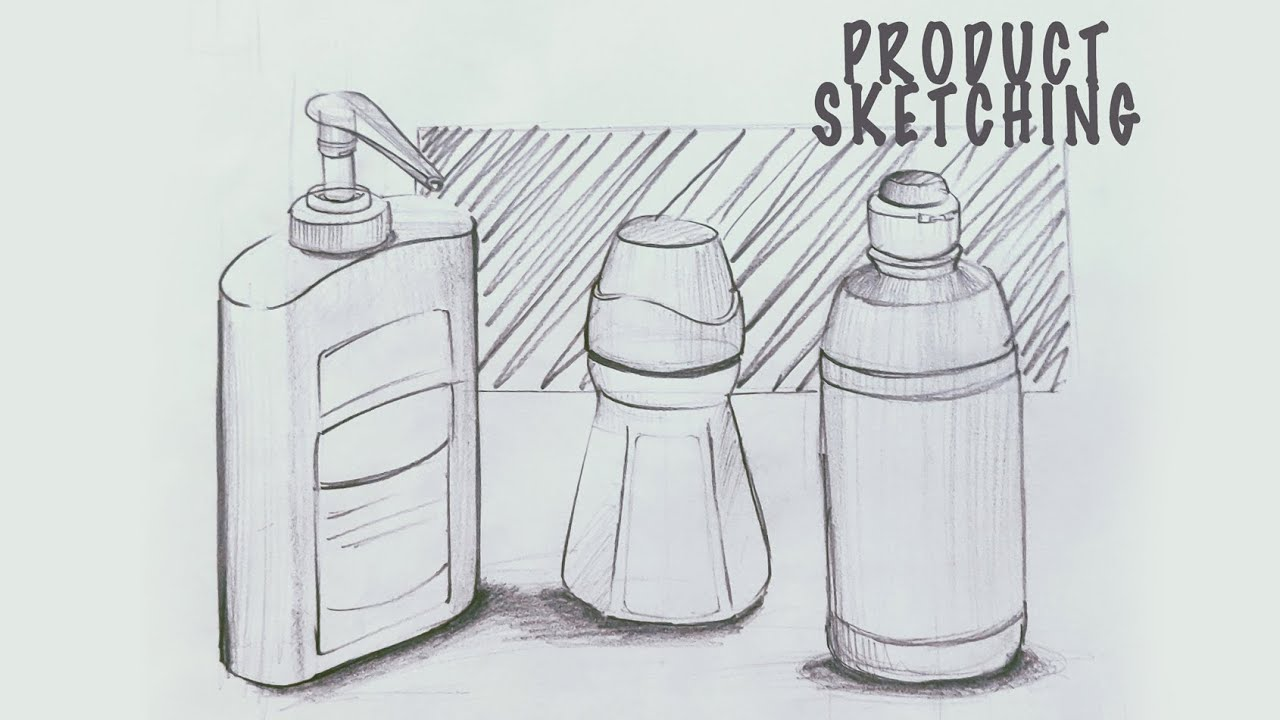

In [ ]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [ ]:
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

Then we can include the image in our prompt by just passing a list of items to generate_content. Note that you will need to use the gemini-pro-vision model if your prompt contains images.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content([prompt, img])
print(response.text)

 {
 "description": "This is a sketch of three different product containers. The first container is a large bottle with a pump top. The second container is a smaller bottle with a flip top. The third container is a tall bottle with a screw top.",
 "features": [
  "The large bottle has a pump top.",
  "The small bottle has a flip top.",
  "The tall bottle has a screw top."
 ]
}


# **Have a chat**

The Gemini API enables you to have freeform conversations across multiple turns.

The ChatSession class will store the conversation history for multi-turn interactions.

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

In [ ]:
response = chat.send_message("In one sentence, explain how a data scientist role is different as compare to data analyst.")
print(response.text)

Data scientists use advanced techniques and algorithms to build models and solve complex problems, while data analysts focus on interpreting and visualizing data to provide insights.


We can see chat history also

In [ ]:
print(chat.history)

[parts {
  text: "In one sentence, explain how a computer works to a young child."
}
role: "user"
, parts {
  text: "A computer is like a super fast friend that can help you learn, play, and create anything you can imagine."
}
role: "model"
, parts {
  text: "In one sentence, explain how a data scientist role is different as compare to data analyst."
}
role: "user"
, parts {
  text: "Data scientists use advanced techniques and algorithms to build models and solve complex problems, while data analysts focus on interpreting and visualizing data to provide insights."
}
role: "model"
]


We can keep sending messages to continue the conversation:

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?")
print(response.text)

**Data analysts** are like detectives who investigate data to uncover hidden patterns and trends. They use statistical and visualization tools to transform raw data into clear and actionable insights. Data analysts help businesses understand their customers, optimize their operations, and make better decisions.

**Data scientists**, on the other hand, are like engineers who build models and algorithms to solve complex problems. They use advanced techniques such as machine learning and artificial intelligence to automate tasks, predict future outcomes, and create new products and services. Data scientists help businesses innovate, gain a competitive edge, and make the world a better place.

**In summary**, data analysts focus on **understanding** data, while data scientists focus on **using** data to solve problems and create value.


# **Set the temperature**
Every prompt you send to the model includes parameters that control how the model generates responses. Use a genai.GenerationConfig to set these, or omit it to use the defaults.

Temperature controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

You can set the generation_config when creating the model.

In [ ]:
model = genai.GenerativeModel(
    'gemini-pro',
    generation_config=genai.GenerationConfig(
        max_output_tokens=2000,
        temperature=0.9,
    ))

Or, set the generation_config on an individual call to generate_content. Any values set there override values on the model constructor.

Note: Although you can set the candidate_count in the generation_config, gemini-pro models will only return a single candidate at the this time.

In [ ]:
response = model.generate_content(
    'Give me a numbered list of benefits of being Data Analyst as compare to data scientest.',
    # Limit to 5 facts.
    generation_config = genai.GenerationConfig(stop_sequences=['\n6'])
)

In [ ]:
print(response.text)

**Benefits of Being a Data Analyst Compared to a Data Scientist**

1. **Lower Barrier to Entry:** Data analysts typically require less education and experience than data scientists, making it easier to enter the field.
2. **Greater Job Availability:** Due to the increasing demand for data analysis, there are more job opportunities available for data analysts than data scientists.
3. **Stronger Focus on Business:** Data analysts are more focused on using data to solve specific business problems, while data scientists typically have a broader research-oriented role.
4. **Less Complex Skills:** Data analysts typically need proficiency in statistical techniques, data manipulation, and visualization tools, while data scientists may require more specialized skills such as machine learning and advanced analytics.
5. **Faster Time to Value:** Data analysts can often deliver results more quickly than data scientists, as they are focused on specific business outcomes rather than long-term resear